# Exploration

In [48]:
import numpy as np
import pandas as pd
from scipy.stats import binom
from scipy.special import binom as binom_coef

%matplotlib inline  
import matplotlib.pyplot as plt

### Analyze the number of votes needed for a classification division

In [ ]:
# crowd_acc = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.]
crowd_acc = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
pred1_machine = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

pred1_hybrid_dict = [{pred1_m: [] for pred1_m in pred1_machine}, 
                     {pred1_m: [] for pred1_m in pred1_machine}, 
                     {pred1_m: [] for pred1_m in pred1_machine}]
for votes_num in [1, 2, 3]:
    for pred1_m in pred1_machine:
        print('pred1_m:{}, k:{}, n:{}'.format(pred1_m, votes_num, votes_num))
        print('---------------------')
        for acc in crowd_acc:
#             votes = np.random.binomial(1, 0.5, votes_num)
#             n, p = votes_num, acc
#             pred1_hybrid = binom.pmf(k, n, p)
            coef1 = binom_coef(votes_num, votes_num)
            term1 = coef1 * acc**(votes_num) * (1-acc)**(votes_num-votes_num) * pred1_m
        
            coef0 = binom_coef(votes_num, votes_num-votes_num)
            pred0_m = 1 - pred1_m
            term0 = coef0 * acc**(votes_num-votes_num) * (1-acc)**votes_num * pred0_m
            
            pred1_hybrid = term1 / (term1 + term0)
            pred1_hybrid_dict[votes_num-1][pred1_m].append(pred1_hybrid)
#             print('w_acc:{:1.3f}, p1_h:{:1.3f}'.format(acc, pred1_hybrid))
        print()


Plot charts

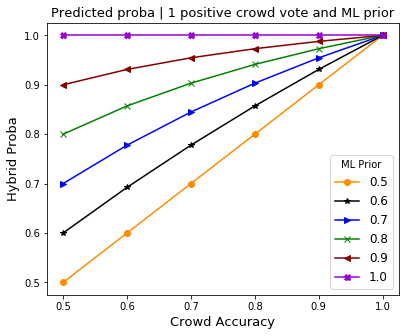

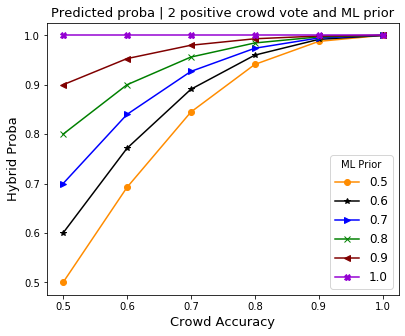

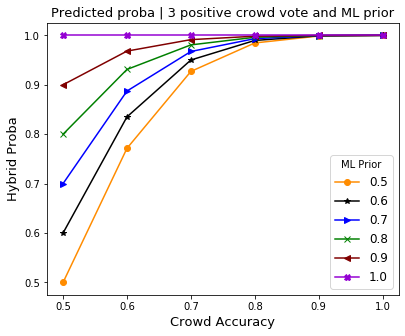

In [127]:
for votes_num in [1, 2, 3]:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6.3,5))

    ax.plot(crowd_acc, pred1_hybrid_dict[votes_num-1][0.5], label='0.5', color='darkorange', linestyle='-', marker='o')
    ax.plot(crowd_acc, pred1_hybrid_dict[votes_num-1][0.6], label='0.6', color='black', linestyle='-', marker='*')
    ax.plot(crowd_acc, pred1_hybrid_dict[votes_num-1][0.7], label='0.7', color='blue', linestyle='-', marker='>')
    ax.plot(crowd_acc, pred1_hybrid_dict[votes_num-1][0.8], label='0.8', color='green', linestyle='-', marker='x')
    ax.plot(crowd_acc, pred1_hybrid_dict[votes_num-1][0.9], label='0.9', color='maroon', linestyle='-', marker='<')
    ax.plot(crowd_acc, pred1_hybrid_dict[votes_num-1][1], label='1.0', color='darkviolet', linestyle='-', marker='X')

    ax.legend( fontsize=12, loc=4, title='ML Prior')
    ax.set_ylabel('Hybrid Proba', fontsize=13)
    ax.set_xlabel('Crowd Accuracy', fontsize=13)
    ax.set_title("Predicted proba | {} positive crowd vote and ML prior".format(votes_num), fontsize=13)
#     fig.savefig("proba_hybrid_synthetic_{}vote.pdf".format(votes_num), bbox_inches='tight')